https://drive.google.com/file/d/1y0r1ES3krzQ5wf1ezLdRj7Vcn7JG4UlF/view?usp=sharing


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# drive.flush_and_unmount()

#yolov8 훈련하기 시작

dataset을 저장할 폴더를 만들고 그곳으로 들어갑니다

In [2]:
%mkdir dataset

In [3]:
!cp /content/drive/MyDrive/Colab_Notebooks/KAIROS/Cobot_Yolo/my_data.zip /content/
# !cp /content/drive/MyDrive/Colab_Notebooks/KAIROS/Yolo/screw_hole_data.zip /content/


In [4]:
!unzip /content/my_data.zip -d dataset/
# !unzip /content/screw_hole_data.zip -d dataset/

Archive:  /content/my_data.zip
   creating: dataset/test/images/
  inflating: dataset/test/images/img_101.jpg  
  inflating: dataset/test/images/img_106.jpg  
  inflating: dataset/test/images/img_43.jpg  
  inflating: dataset/test/images/img_57.jpg  
  inflating: dataset/test/images/img_58.jpg  
  inflating: dataset/test/images/img_60.jpg  
  inflating: dataset/test/images/img_66.jpg  
  inflating: dataset/test/images/img_79.jpg  
  inflating: dataset/test/images/img_92.jpg  
  inflating: dataset/test/images/img_93.jpg  
  inflating: dataset/test/images/img_96.jpg  
  inflating: dataset/test/images/img_99.jpg  
   creating: dataset/train/images/
  inflating: dataset/train/images/img_0.jpg  
  inflating: dataset/train/images/img_1.jpg  
  inflating: dataset/train/images/img_10.jpg  
  inflating: dataset/train/images/img_100.jpg  
  inflating: dataset/train/images/img_103.jpg  
  inflating: dataset/train/images/img_104.jpg  
  inflating: dataset/train/images/img_105.jpg  
  inflating: da

In [ ]:
#%cd dataset

(480, 640, 3)


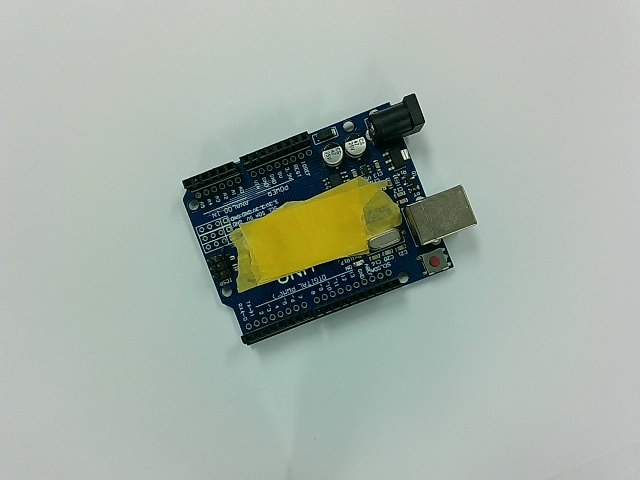

In [5]:
# Check if image all loarded ok
import glob
import cv2
from google.colab.patches import cv2_imshow
import random


# 이미지 파일 경로를 가져오기
# image_paths = glob.glob('/content/drive/MyDrive/team/test/images/*.jpg')
# image_paths = glob.glob('/content/dataset/team/test/images/*.png')
image_paths = glob.glob('/content/dataset/test/images/*.jpg')
# image_paths = glob.glob('/content/dataset/my_data/test/images/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    selected_image_path = random.choice(image_paths)

    # 이미지 표시
    img = cv2.imread(selected_image_path)
    print(img.shape)
    cv2_imshow(img)

해당경로에 이미지와 data.yaml이 나온것을 확인 할 수 있습니다

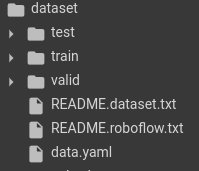

data.yaml을 확인합니다

In [ ]:
#%cat data.yaml

새로운 yaml파일을 만들고 train, val, test 데이터셋 경로가 올바른게 작성해줘야 합니다



```
변경전                       변경후
train: ../train/images  ->  'train' : '/content/dataset/train/images'
```



In [6]:
import yaml

data = {
        # 'train' : '/content/dataset/my_data/train/images',
        # 'test' : '/content/dataset/my_data/test/images',
        # 'val' : '/content/dataset/my_data/valid/images',
        'train' : '/content/dataset/train/images',
        'test' : '/content/dataset/test/images',
        'val' : '/content/dataset/valid/images',

        'nc': 2,
        'names': ['Normal','Error']
        # 'names' : ['NG', 'OK']
}

# with open('/content/dataset/my_data/custom_data.yaml', 'w') as f:
with open('/content/dataset/custom_data.yaml', 'w') as f:
  yaml.dump(data, f)

custom_data.yaml 파일을 만들었으니 제대로 작성이 되었는지 확인합니다

In [7]:
# with open('/content/dataset/my_data/custom_data.yaml', 'r') as f:
with open('/content/dataset/custom_data.yaml', 'r') as f:
  view_yaml = yaml.safe_load(f)
  display(view_yaml)


{'names': ['Normal', 'Error'],
 'nc': 2,
 'test': '/content/dataset/test/images',
 'train': '/content/dataset/train/images',
 'val': '/content/dataset/valid/images'}

yolov8을 인스톨합니다

In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.6/749.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

yolov8이 제대로 설치가 되었는지 확인합니다

In [9]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/201.2 GB disk)


사전에 학습된 yolov8n.pt를 가져오고 적용시킵니다

yolov8의 학습파일은 yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt 등이 있습니다

In [10]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 20.6MB/s]


yolov8에서 사용하는 model이 yolov8n.pt 인지 확인해봅니다

yolov8은 cocodata의 분류를 가져서 80개의 name이 저장되어있습니다

In [11]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

우리가 원하는 데이터셋 경로를 가진 custom_data.yaml을 가지고 학습을 시작합니다

In [12]:
results = model.predict('https://ultralytics.com/images/bus.jpg', save=True, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()




100%|██████████| 476k/476k [00:00<00:00, 3.70MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 106.2ms
Speed: 13.5ms preprocess, 106.2ms inference, 4310.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


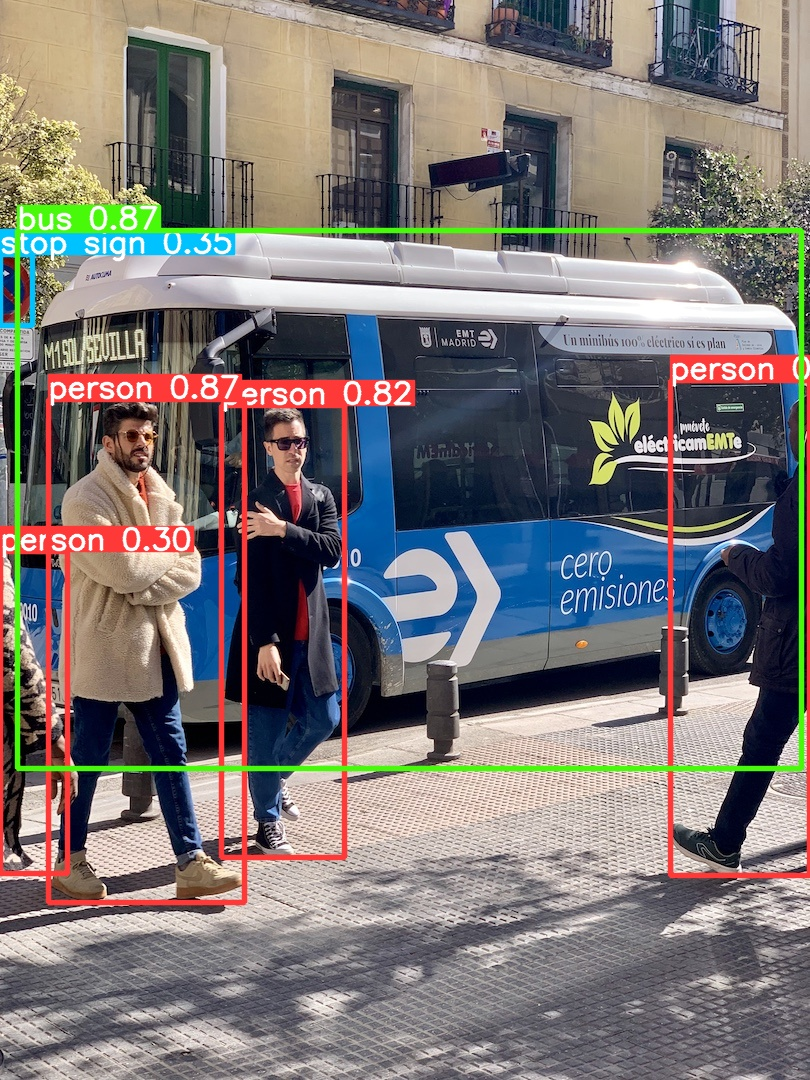

In [13]:
from IPython.display import Image, clear_output
Image(filename='/content/runs/detect/predict/bus.jpg',width=1000)

In [14]:
# model.train(data='/content/dataset/my_data/custom_data.yaml', epochs= 100, patience = 20, batch=32, imgsz =640)
model.train(data='/content/dataset/custom_data.yaml', epochs= 100, patience = 20, batch=32, imgsz =640)

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/custom_data.yaml, epochs=100, time=None, patience=20, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 4.84MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 79 images, 0 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<00:00, 736.31it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/valid/labels... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<00:00, 274.95it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.44G      2.624      3.625      2.518         43        640: 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all         22         22    0.00318      0.955      0.277     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.43G      2.629      3.712      2.573         35        640: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         22         22    0.00318      0.955      0.199     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.45G      2.639      3.664      2.485         35        640: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         22         22    0.00333          1      0.289     0.0783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.45G      1.827      3.034       1.92         37        640: 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         22         22    0.00333          1      0.348      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.45G      1.316      2.378      1.572         29        640: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         22         22    0.00263      0.773      0.305      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.45G     0.9741      1.917      1.404         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         22         22        0.5      0.264      0.471      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.45G     0.8981      1.759      1.316         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         22         22       0.47      0.286      0.464       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.45G     0.7921      1.473      1.254         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         22         22      0.938      0.318      0.505       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.45G     0.7975      1.278      1.261         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         22         22          1      0.358      0.515      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.45G     0.6995      1.174      1.184         40        640: 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         22         22      0.991      0.364      0.537      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.45G     0.7189      1.196      1.125         35        640: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         22         22      0.978      0.364       0.54      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.45G      0.672      1.018      1.141         41        640: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         22         22      0.942      0.455      0.641      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.45G     0.6271     0.9971      1.117         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         22         22       0.89      0.455      0.674      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.45G     0.6912     0.9702      1.124         37        640: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         22         22      0.903      0.381      0.769      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.45G     0.6447     0.9664      1.117         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         22         22          1      0.592      0.829      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.45G     0.5876     0.9375      1.093         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         22         22      0.975      0.799      0.926      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.45G       0.67     0.9177      1.126         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         22         22      0.968      0.994      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.46G     0.6462     0.9432      1.109         36        640: 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         22         22      0.987          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.45G     0.5671     0.9183      1.065         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         22         22      0.987          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.46G     0.6454     0.9322      1.121         41        640: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         22         22      0.976          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.45G     0.5347     0.8628      1.058         45        640: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         22         22      0.967          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.46G     0.5715     0.8514      1.059         33        640: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         22         22      0.908          1      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.45G     0.5308     0.7655      1.034         35        640: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         22         22      0.899          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.46G     0.5868     0.8455      1.085         30        640: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         22         22      0.971          1      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.45G     0.5839     0.7798      1.047         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         22         22      0.986          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.46G     0.5961     0.8497      1.064         38        640: 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         22         22      0.994          1      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.45G     0.5358     0.7969      1.044         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         22         22       0.99          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.46G     0.5181     0.7462      1.014         39        640: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         22         22      0.992          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.45G     0.5341     0.7191      1.054         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         22         22      0.993          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.46G     0.5046     0.7721      1.029         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         22         22      0.994          1      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.45G     0.6363     0.7882      1.075         33        640: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         22         22      0.993          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.46G     0.5627     0.7438       1.05         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         22         22      0.993          1      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.45G     0.5718     0.7393      1.061         40        640: 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         22         22      0.989          1      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.46G     0.5803     0.7314      1.023         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         22         22      0.978          1      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.45G     0.5444     0.7292      1.028         38        640: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         22         22      0.983          1      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.46G     0.5097      0.646     0.9852         41        640: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         22         22      0.992          1      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.45G     0.4977     0.6191       1.01         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         22         22      0.994          1      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.46G      0.515     0.6102      1.003         33        640: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         22         22      0.994          1      0.995      0.969

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.45G     0.5424     0.6879       1.03         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         22         22      0.995          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.46G     0.4818     0.6068      0.986         35        640: 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         22         22      0.993          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.45G     0.5609     0.6444      1.058         32        640: 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         22         22      0.993          1      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.46G     0.5301     0.6466      1.022         35        640: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         22         22      0.994          1      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.45G     0.5014     0.5811      1.038         39        640: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         22         22      0.995          1      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.46G      0.502     0.5988      1.018         33        640: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         22         22      0.995          1      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.45G     0.4759     0.5817     0.9923         40        640: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         22         22      0.995          1      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.46G     0.5051      0.581      1.006         37        640: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         22         22      0.995          1      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.45G     0.5201     0.5924      1.048         41        640: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         22         22      0.995          1      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.46G     0.4899     0.5589          1         43        640: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         22         22      0.995          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.45G     0.5158     0.5876     0.9968         37        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         22         22      0.994          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.46G     0.5375     0.5965      1.003         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]


                   all         22         22      0.992          1      0.995      0.972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.45G     0.5078     0.5986      1.014         37        640: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         22         22      0.992          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.46G     0.4971     0.5939      1.007         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         22         22      0.994          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.45G     0.4893     0.5444     0.9941         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         22         22      0.994          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.46G     0.4877     0.5366     0.9855         39        640: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         22         22      0.995          1      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.45G     0.4326     0.5132     0.9566         38        640: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         22         22      0.994          1      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.46G     0.5116     0.5469      1.027         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         22         22      0.989          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.45G     0.4528     0.4828     0.9828         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         22         22      0.989          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.46G     0.4666     0.5444     0.9859         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         22         22       0.99          1      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.45G     0.4433     0.4937     0.9833         43        640: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         22         22      0.993          1      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.46G     0.4961     0.5622      1.028         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         22         22      0.995          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.45G     0.4425     0.4853     0.9462         38        640: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         22         22      0.995          1      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.46G     0.4883     0.5032      1.006         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         22         22      0.993          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.45G      0.491     0.5261     0.9862         43        640: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         22         22      0.993          1      0.995      0.958
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 43, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



63 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


                   all         22         22      0.995          1      0.995      0.986
                Normal         22         11      0.994          1      0.995      0.986
                 Error         22         11      0.995          1      0.995      0.986
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b8108ef5750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

학습한 결과 분석은 다음경로에 새롭게 저장되었습니다

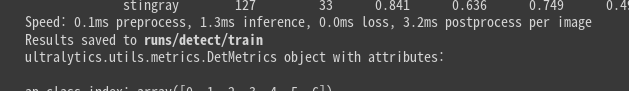

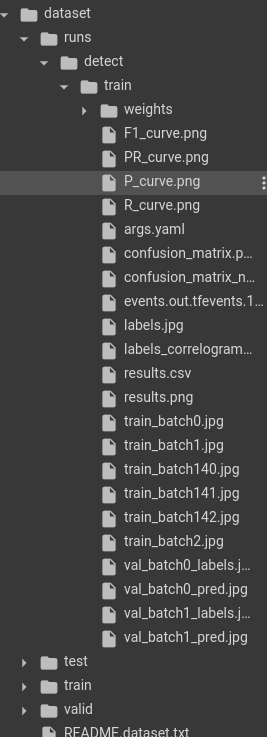

학습한 모델은 weights/best.pt 로 저장되어있습니다

yolov8은 학습하고 나서 자동적으로 모델을 변경합니다

실제로 변경되는지 확인합니다

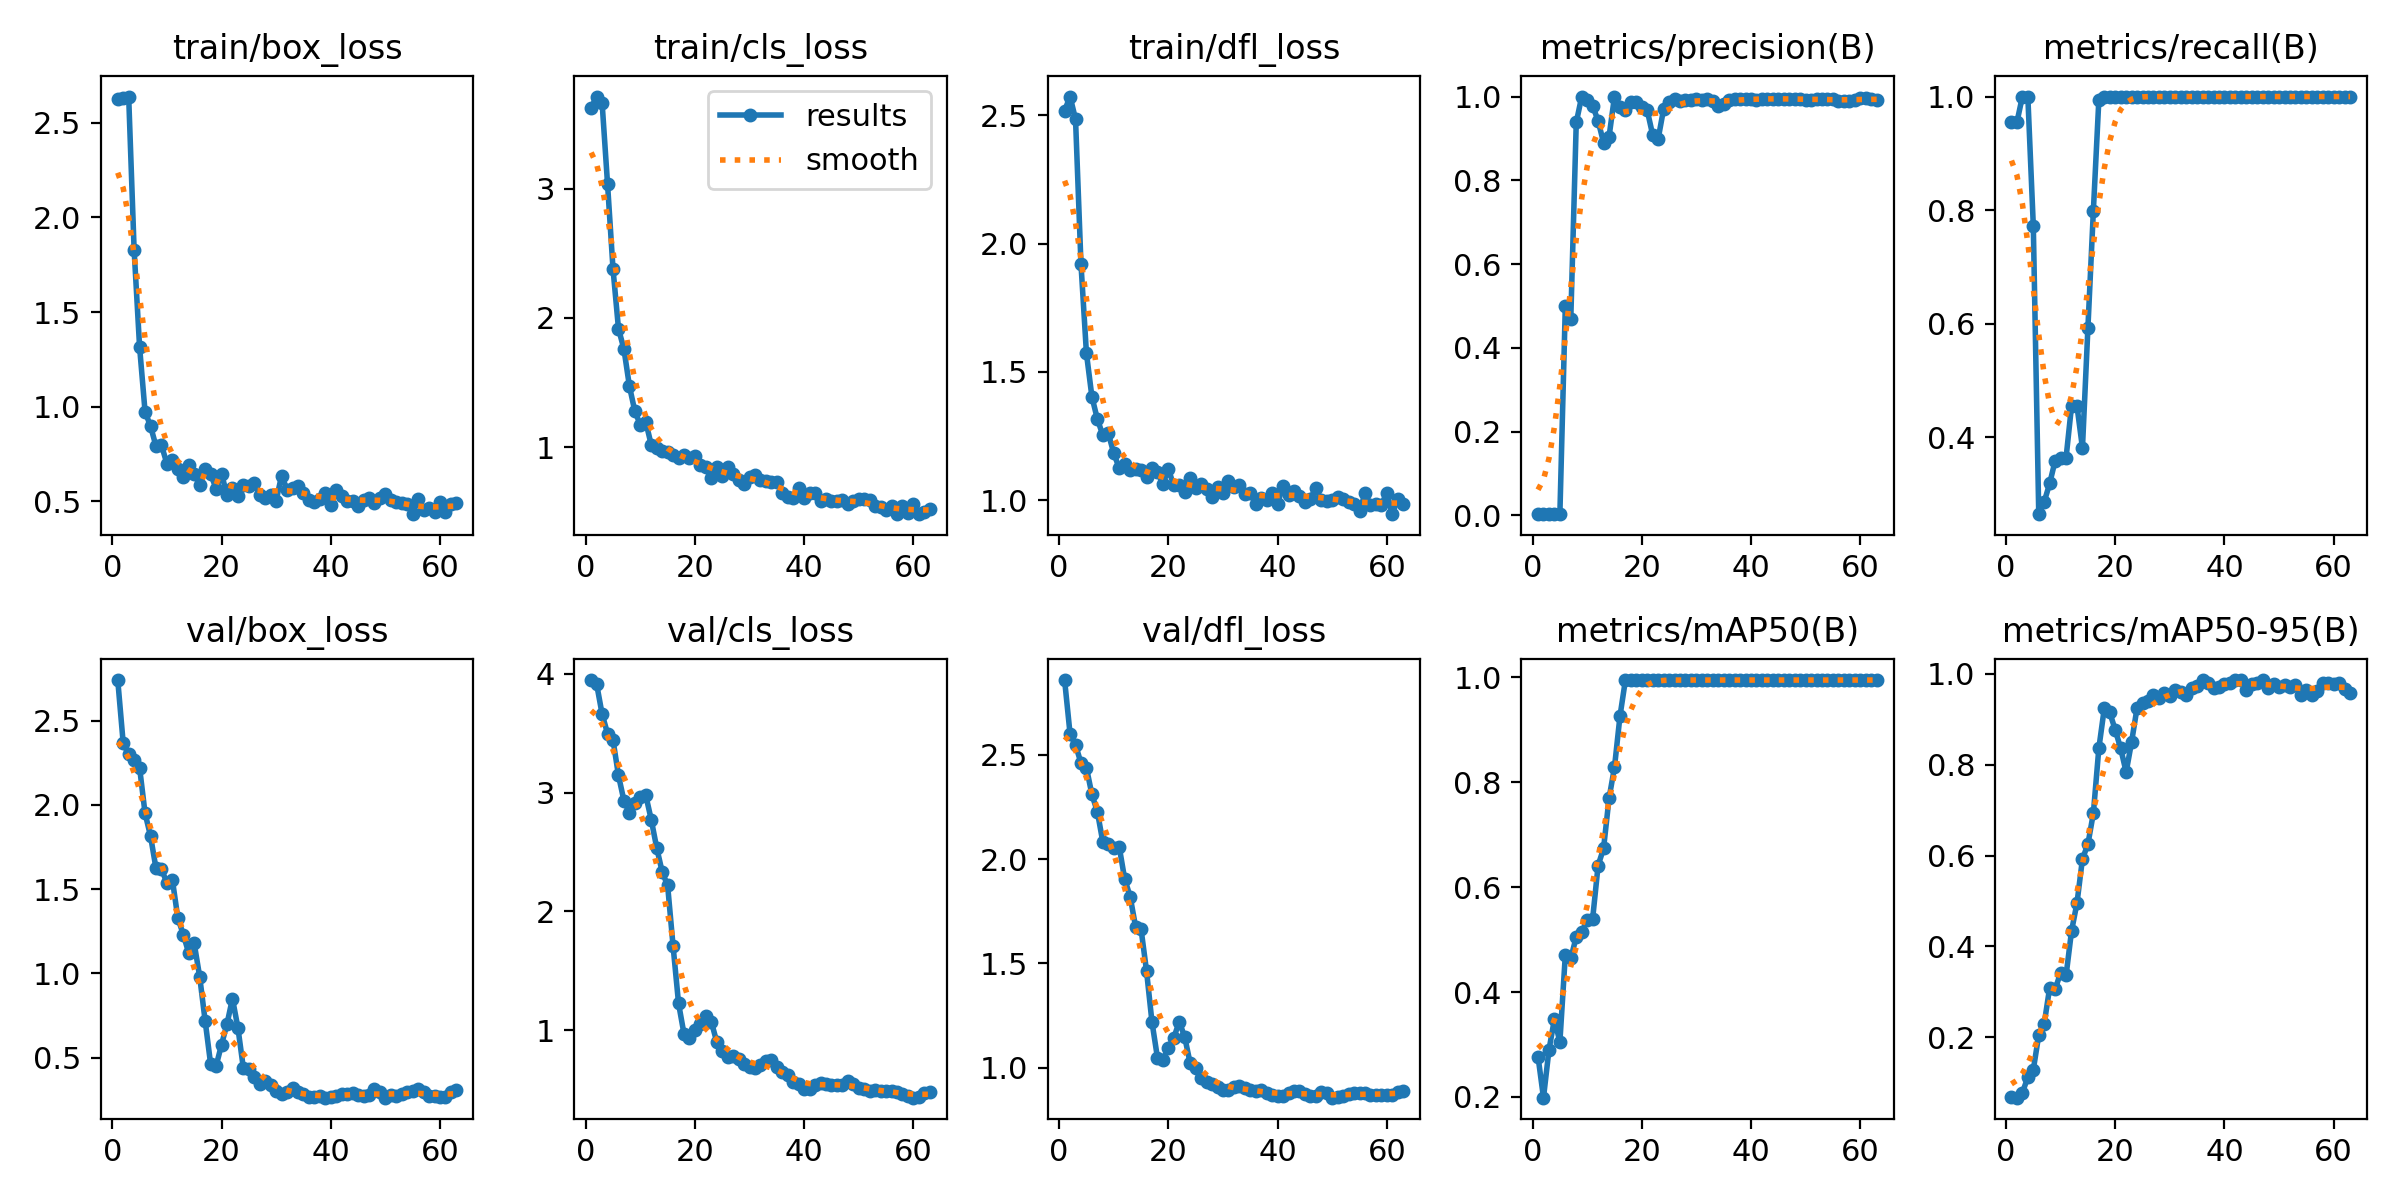

In [15]:
from IPython.display import Image, clear_output
Image(filename='/content/runs/detect/train/results.png',width=1000)

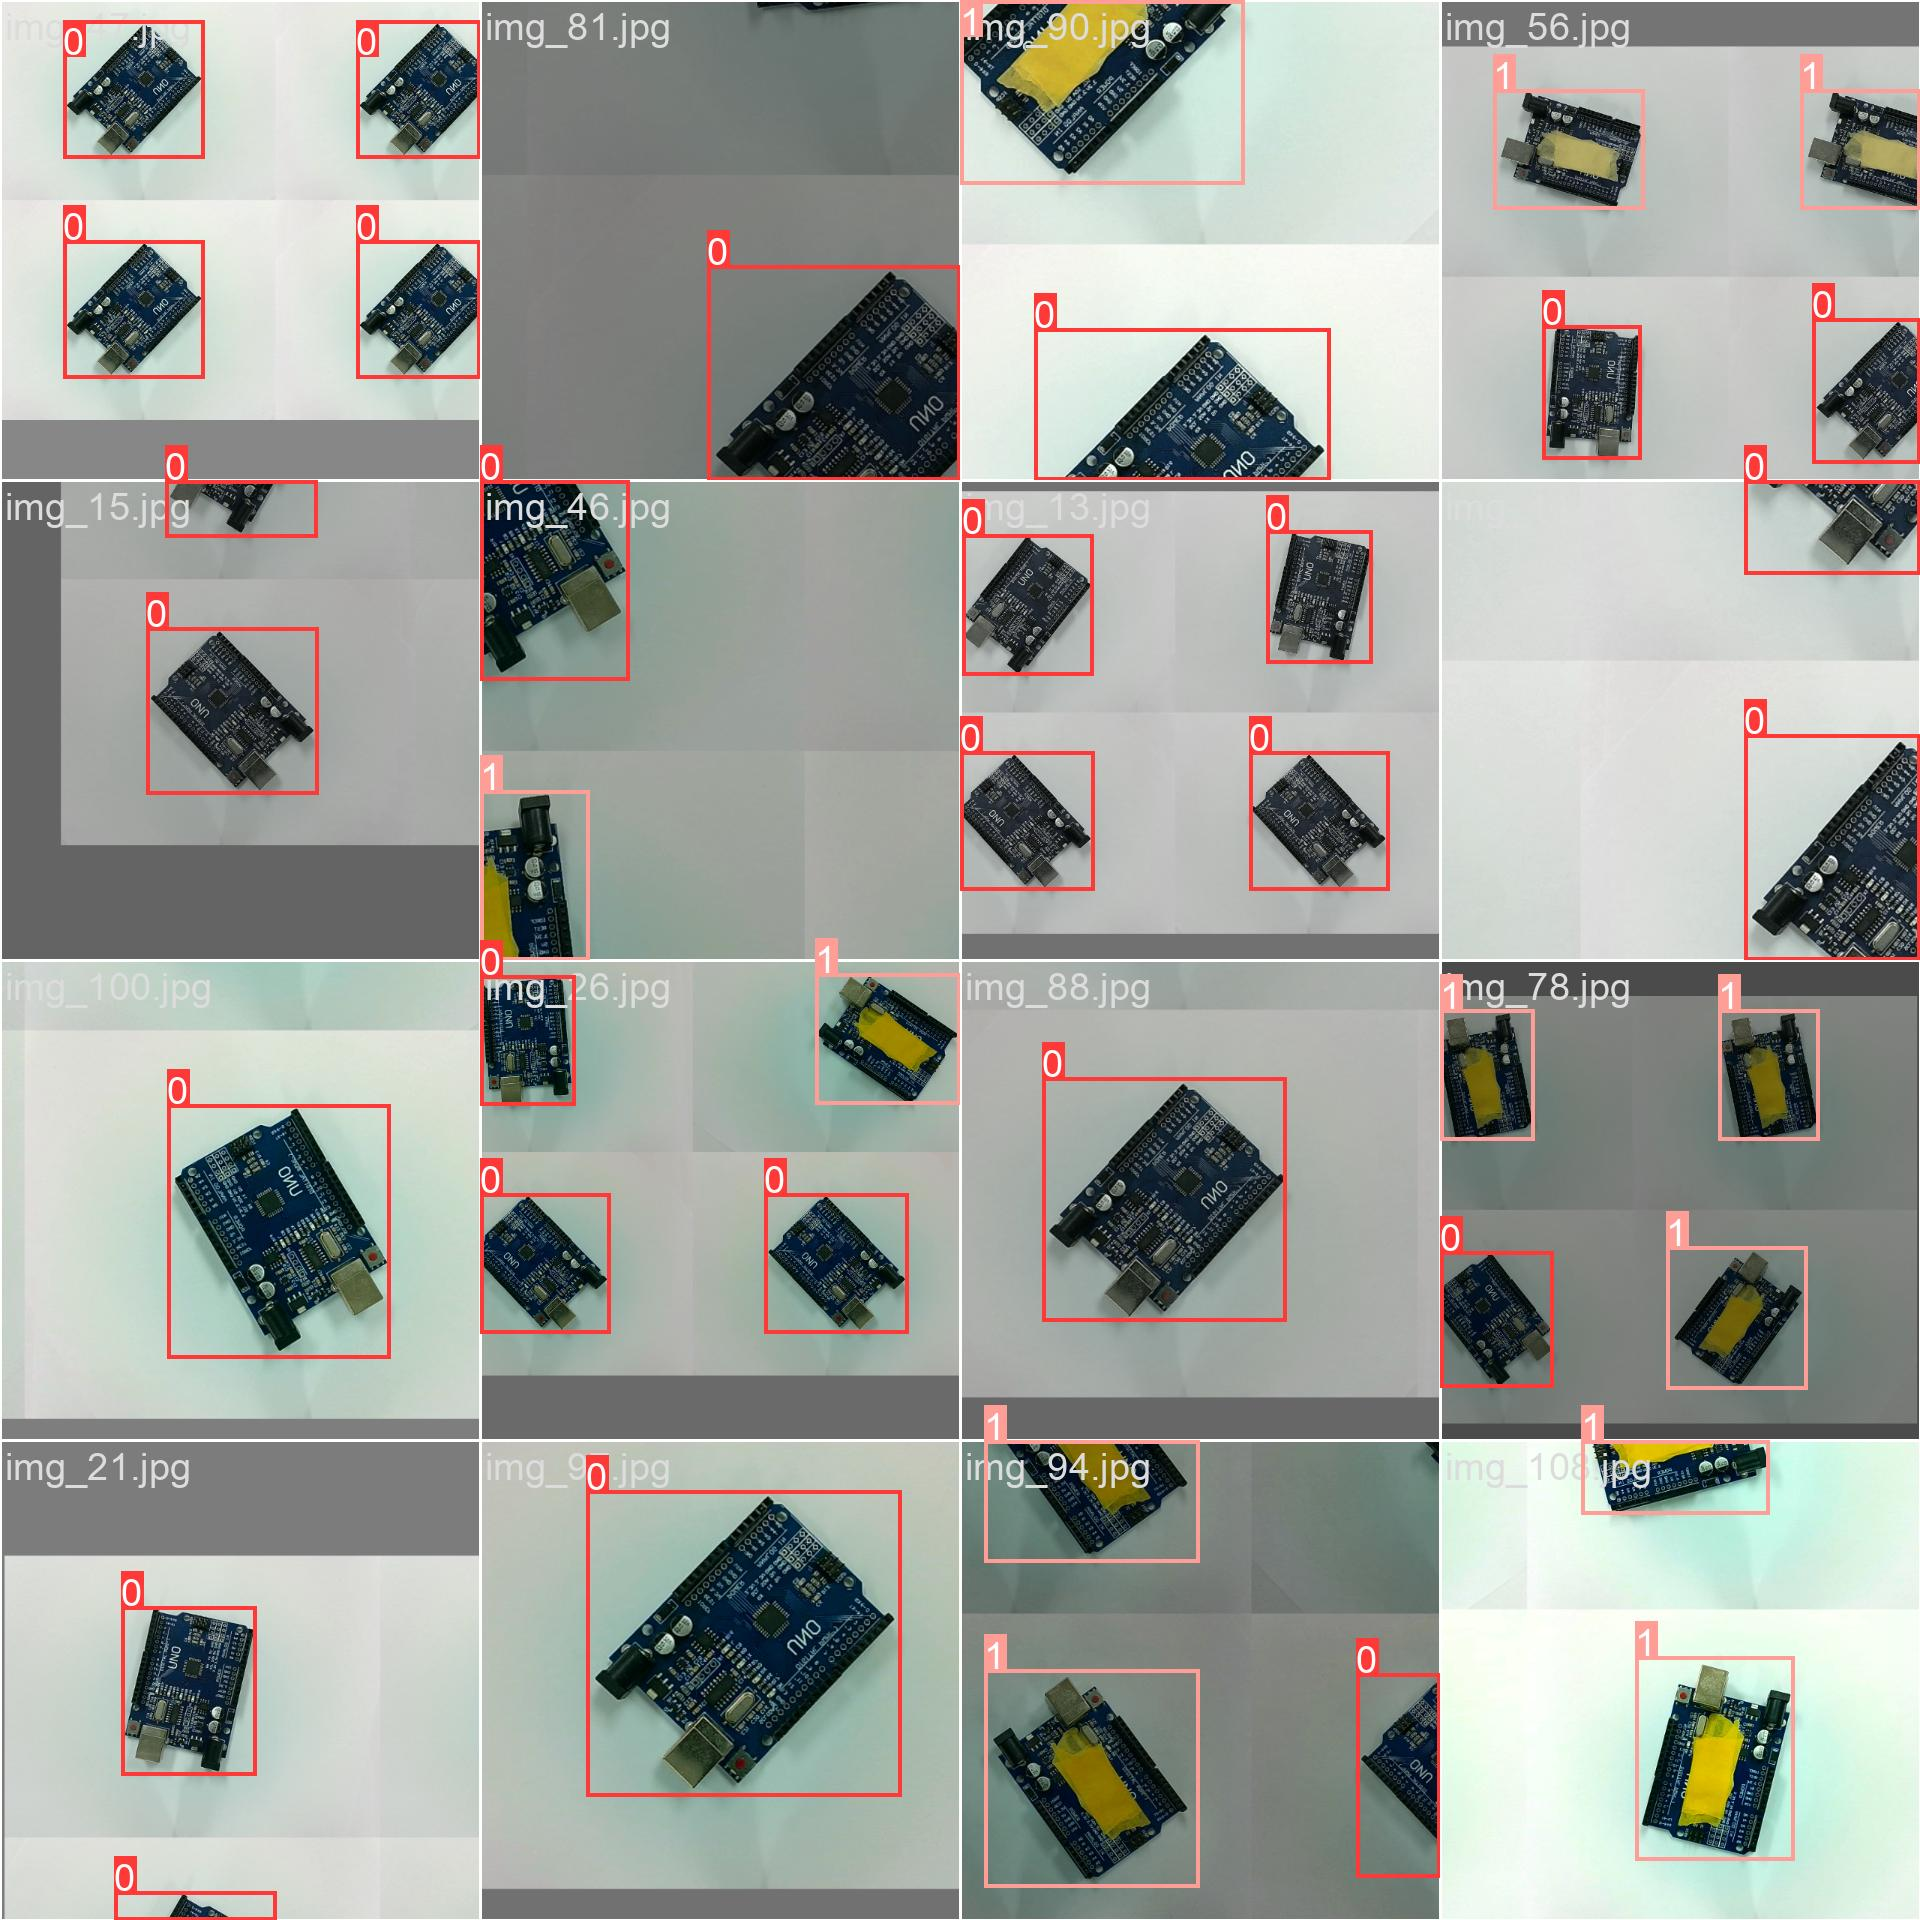

In [16]:
Image(filename='/content/runs/detect/train/train_batch0.jpg',width=1000)
# Image(filename='/content/runs/detect/train33/train_batch0.jpg',width=1000)

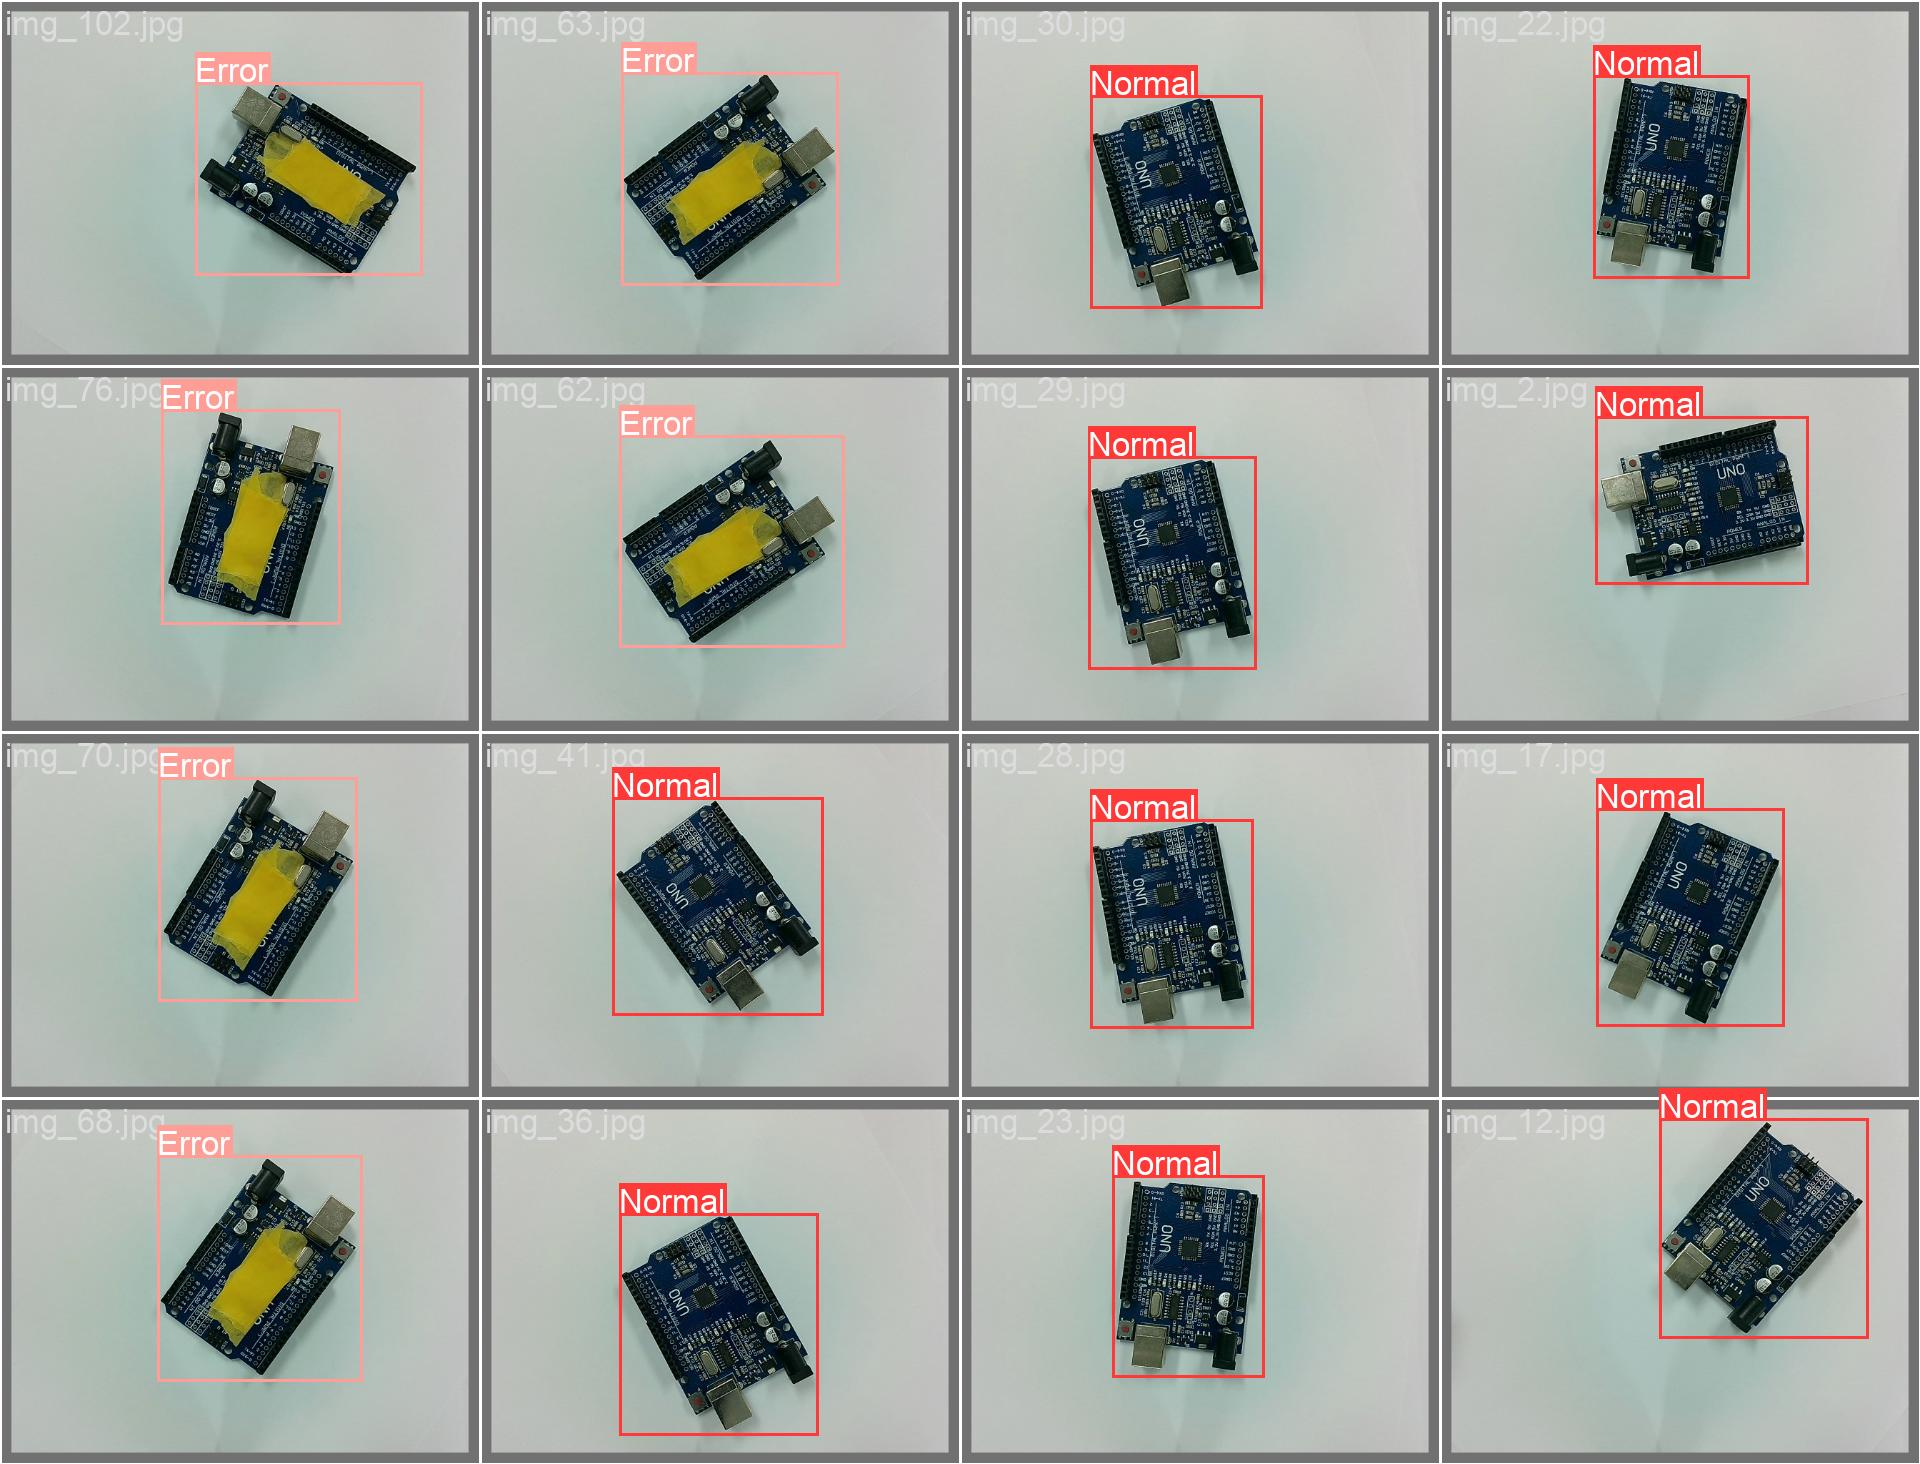

In [17]:
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg',width=1000)


In [18]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 2
{0: 'Normal', 1: 'Error'}


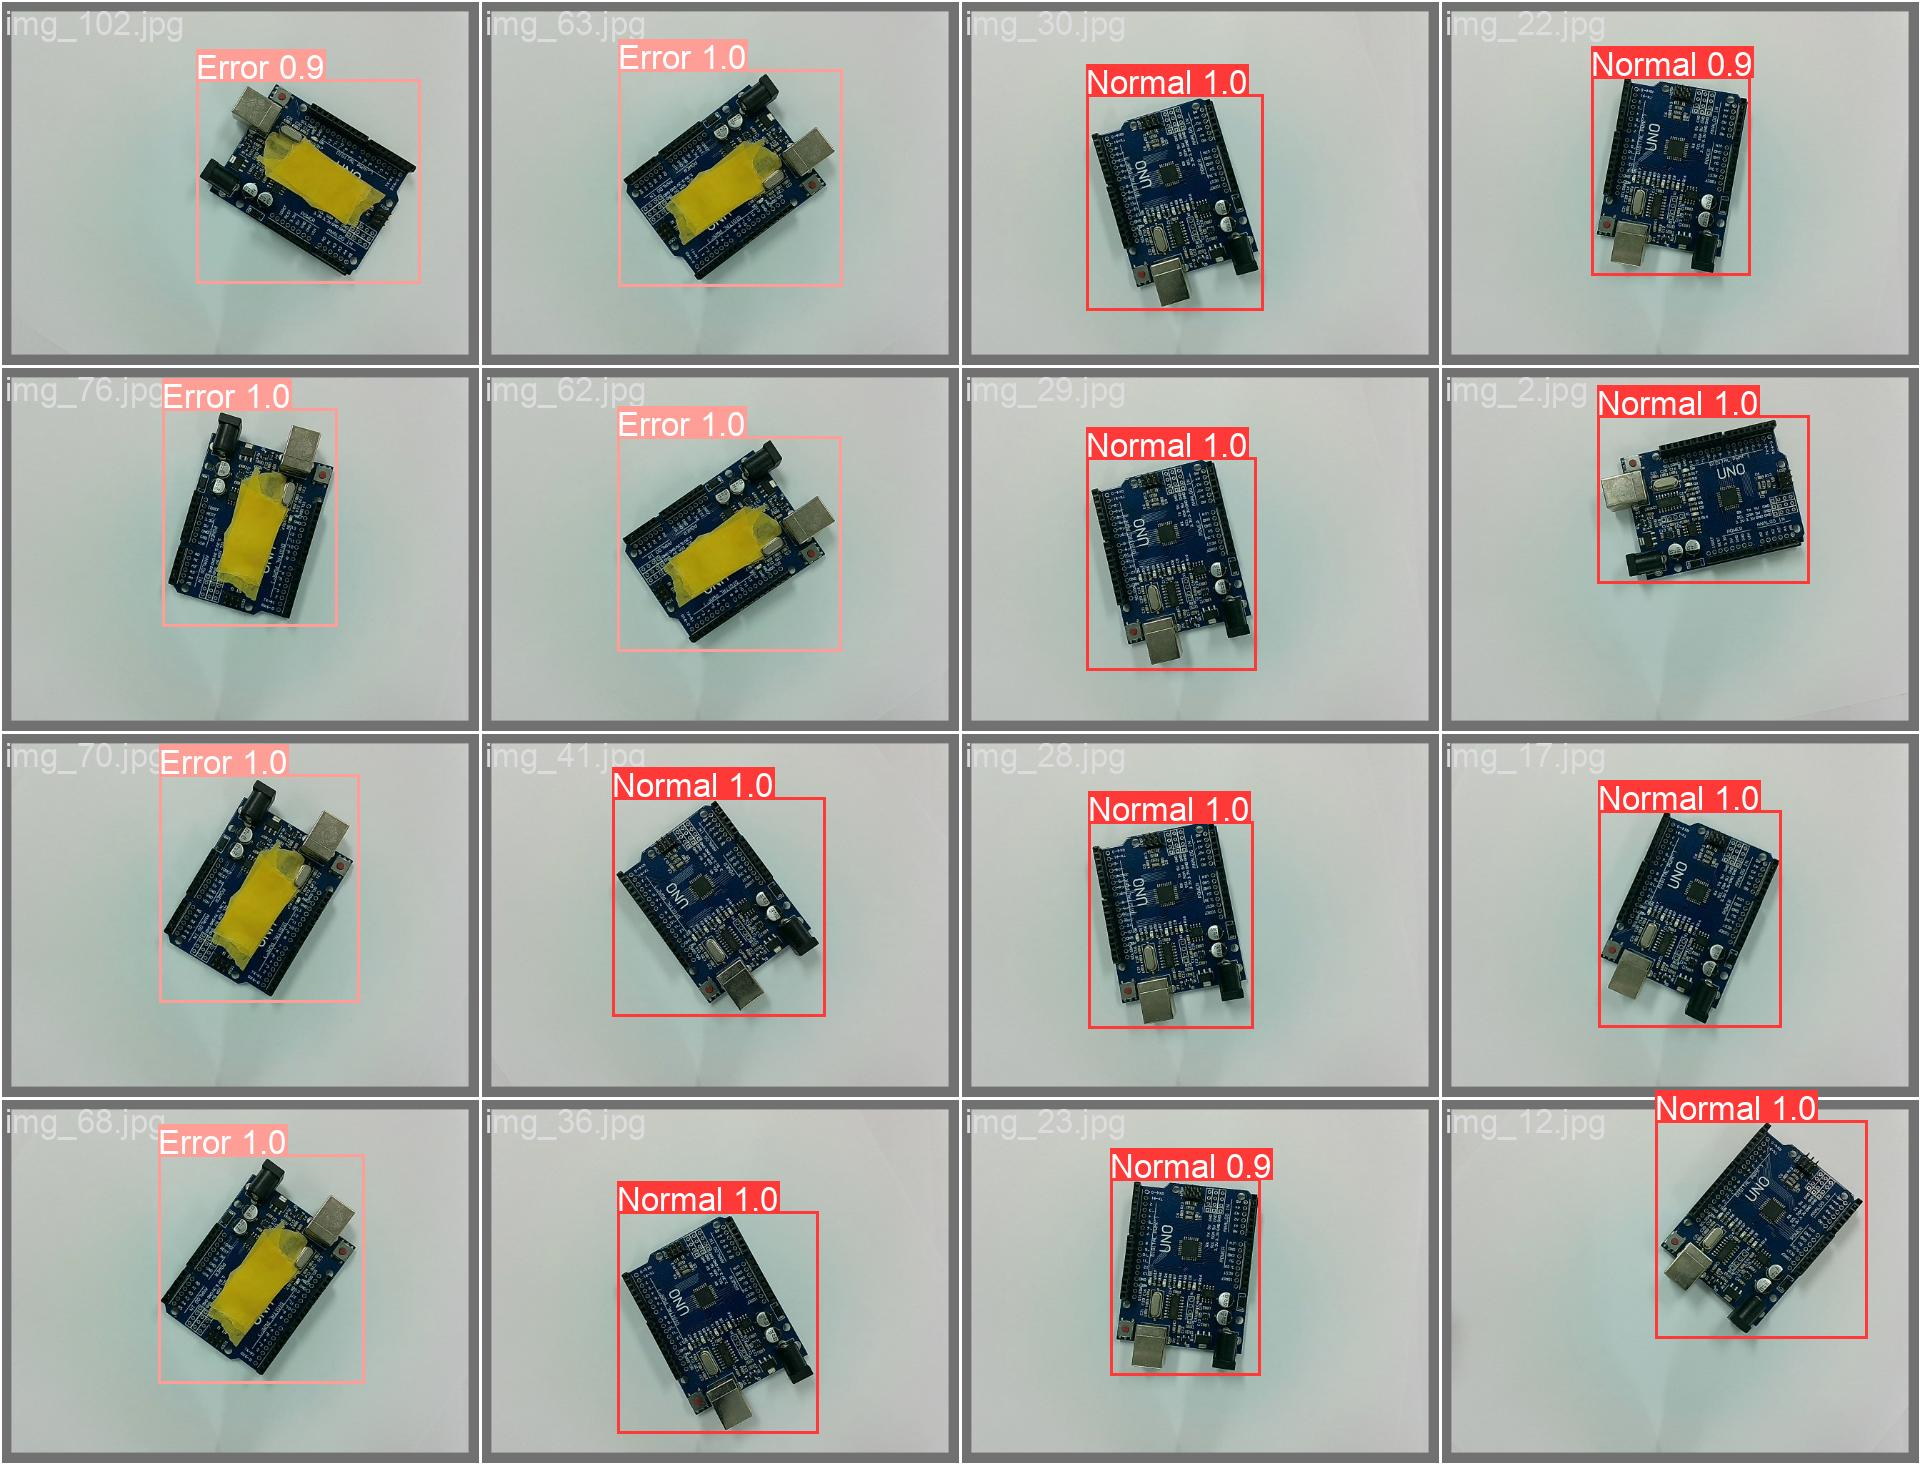

In [19]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg',width=1000)

학습된 결과물을 출력하는 부분입니다

마지막 출력문인 'Results saved to '이후에 나오는 경로가 학습된 이미지 출력이 있는 폴더의 경로입니다

image.png

In [20]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [21]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 2
{0: 'Normal', 1: 'Error'}


In [22]:
# 테스트 이미지

from glob import glob

test_image_list = glob('/content/dataset/test/images/*')

print(len(test_image_list))

test_image_list.sort()

for i in range(len(test_image_list)):

    print('i = ',i, test_image_list[i])

12
i =  0 /content/dataset/test/images/img_101.jpg
i =  1 /content/dataset/test/images/img_106.jpg
i =  2 /content/dataset/test/images/img_43.jpg
i =  3 /content/dataset/test/images/img_57.jpg
i =  4 /content/dataset/test/images/img_58.jpg
i =  5 /content/dataset/test/images/img_60.jpg
i =  6 /content/dataset/test/images/img_66.jpg
i =  7 /content/dataset/test/images/img_79.jpg
i =  8 /content/dataset/test/images/img_92.jpg
i =  9 /content/dataset/test/images/img_93.jpg
i =  10 /content/dataset/test/images/img_96.jpg
i =  11 /content/dataset/test/images/img_99.jpg


In [23]:
# results = model.predict(source ='/content/dataset/my_data/test/images/', save=True)
results = model.predict(source ='/content/dataset/test/images/', save=True)


image 1/12 /content/dataset/test/images/img_101.jpg: 480x640 1 Error, 115.1ms
image 2/12 /content/dataset/test/images/img_106.jpg: 480x640 1 Error, 8.1ms
image 3/12 /content/dataset/test/images/img_43.jpg: 480x640 1 Normal, 9.4ms
image 4/12 /content/dataset/test/images/img_57.jpg: 480x640 1 Error, 8.2ms
image 5/12 /content/dataset/test/images/img_58.jpg: 480x640 1 Error, 8.1ms
image 6/12 /content/dataset/test/images/img_60.jpg: 480x640 1 Error, 8.2ms
image 7/12 /content/dataset/test/images/img_66.jpg: 480x640 1 Error, 13.6ms
image 8/12 /content/dataset/test/images/img_79.jpg: 480x640 1 Error, 7.8ms
image 9/12 /content/dataset/test/images/img_92.jpg: 480x640 1 Error, 7.9ms
image 10/12 /content/dataset/test/images/img_93.jpg: 480x640 1 Error, 7.9ms
image 11/12 /content/dataset/test/images/img_96.jpg: 480x640 1 Error, 8.6ms
image 12/12 /content/dataset/test/images/img_99.jpg: 480x640 1 Error, 7.8ms
Speed: 1.4ms preprocess, 17.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480

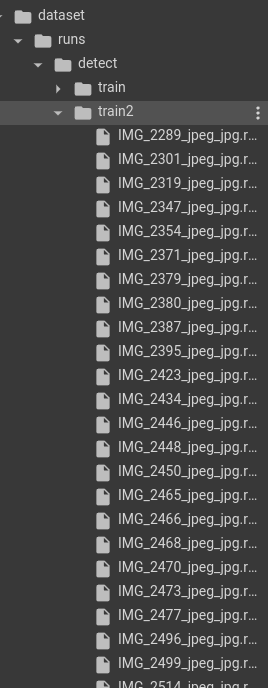

해당 경로에서 랜덤으로 이미지 출력을 보는 코드입니다

colab은 특수한 패키지를 사용해야 볼 수 있습니다

In [24]:
# 이미지 파일 경로를 가져오기
# image_paths = glob('/content/runs/detect/predict2/*.jpg')
image_paths = glob('/content/runs/detect/predict2/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    # selected_image_path = random.choice(image_paths)
    # 이미지 표시
    # img = cv2.imread(selected_image_path)

    for image_path in image_paths:
      img = cv2.imread(image_path)
      cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

만약 실제로 학습한 데이터를 자신의 드라이브에 저장하고 싶다면

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
%mkdir /content/drive/MyDrive/team


In [ ]:
%cp runs/detect/train/weights/best.pt /content/drive/MyDrive/team